# Predicting Diamond Prices

# Loading and Reading the Data

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/BA810 group project/'
data = pd.read_csv(data_folder+'diamonds.csv')

Mounted at /content/drive


In [ ]:
#creating copy of the raw dataset
df = data.copy()

In [ ]:
#dropping the 'Unnamed:0' column as it was only showing the index
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()
#There are 0 values in dimensions (x,y,z). Analyzing them further

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Identifying Missing Values

In [ ]:
zero_dimension = (df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)
df[zero_dimension]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
#Dataset have 20 values when at least one of the dimensions is equal to zero.
#These rows constitutes only 0.03% of the whoel dataset. Dropping them wouldn't
#have much effect in our analysis but we decided to impute those values
((df[zero_dimension].count()[0]/df.count()[0])*100).round(4)

0.0371

# Splitting the data into Train and Test

In [ ]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(43152, 10788)

In [ ]:
df_X = train_set.drop("price", axis=1).copy()
df_y = train_set["price"].copy()

# Imputing the Missing Values

In [ ]:
#Identifying the rows where at least one of the dimension is equal to 0
zero_dimension = ((df_X['x'] == 0) | (df_X['y'] == 0) | (df_X['z'] == 0))
df_X[zero_dimension]
#df_X[zero_dimension].count()[0]

,carat,cut,color,clarity,depth,table,x,y,z
49557,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0
27739,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0
51506,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,0.00,0.00,0.0
27112,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0


In [ ]:
#Replacing 0 dimensions with NaN in order to be able to use the imputer strategies
#df_X1 = df_X.copy()
df_X['x'].replace(0, np.nan, inplace=True)
df_X['y'].replace(0, np.nan, inplace=True)
df_X['z'].replace(0, np.nan, inplace=True)

null_rows_idx = (df_X['x'].isnull() | df_X['y'].isnull() | df_X['z'].isnull())
df_X[null_rows_idx]
#df_X[zero_dimension]

,carat,cut,color,clarity,depth,table,x,y,z
49557,0.71,Good,F,SI2,64.1,60.0,NaN,NaN,NaN
49556,0.71,Good,F,SI2,64.1,60.0,NaN,NaN,NaN
27739,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,NaN
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,NaN
11963,1.00,Very Good,H,VS2,63.3,53.0,NaN,NaN,NaN
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,NaN
51506,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,NaN
24520,1.56,Ideal,G,VS2,62.2,54.0,NaN,NaN,NaN
27429,2.25,Premium,H,SI2,62.8,59.0,NaN,NaN,NaN
27112,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,NaN


In [ ]:
#SimpleImputer(median)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df_X_num = df_X.select_dtypes(include=[np.number])
imputer.fit(df_X_num)
X = imputer.transform(df_X_num)
df_X_num_median = pd.DataFrame(X, columns=df_X_num.columns, index=df_X_num.index)

df_X_num_median.loc[null_rows_idx]

,carat,depth,table,x,y,z
49557,0.71,64.1,60.0,5.70,5.71,3.53
49556,0.71,64.1,60.0,5.70,5.71,3.53
27739,2.80,63.8,58.0,8.90,8.85,3.53
5471,1.01,59.2,58.0,6.50,6.47,3.53
11963,1.00,63.3,53.0,5.70,5.71,3.53
2207,1.00,59.1,59.0,6.55,6.48,3.53
51506,1.12,60.4,59.0,6.71,6.67,3.53
24520,1.56,62.2,54.0,5.70,5.71,3.53
27429,2.25,62.8,59.0,5.70,5.71,3.53
27112,2.20,61.2,59.0,8.42,8.37,3.53


In [ ]:
#IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_X_num = df_X.select_dtypes(include=[np.number])
imputer.fit(df_X_num)
X = imputer.transform(df_X_num)
df_X_num_iter = pd.DataFrame(X, columns=df_X_num.columns, index=df_X_num.index)
df_X_num_iter.loc[null_rows_idx]


,carat,depth,table,x,y,z
49557,0.71,64.1,60.0,5.437816,5.416072,3.491797
49556,0.71,64.1,60.0,5.437816,5.416072,3.491797
27739,2.80,63.8,58.0,8.900000,8.850000,5.624692
5471,1.01,59.2,58.0,6.500000,6.470000,3.858588
11963,1.00,63.3,53.0,6.124597,6.136313,3.879037
2207,1.00,59.1,59.0,6.550000,6.480000,3.878306
51506,1.12,60.4,59.0,6.710000,6.670000,4.055959
24520,1.56,62.2,54.0,7.454176,7.454745,4.631172
27429,2.25,62.8,59.0,9.017087,8.972787,5.618850
27112,2.20,61.2,59.0,8.420000,8.370000,5.164935


We can also see that row 49556 and 49557 are identical and both have null dimensions, we can drop one of them.

# Feature Selection

In [ ]:
#@title 1.Forward Search

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', IterativeImputer()),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False)) # returns a 
        # regular matrix that can be combined easily with the data we get from 
        # the numeric pipeline
    ])

IterativeImputer.get_feature_names_out = StandardScaler.get_feature_names_out
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  # patching
#carat	cut	color	clarity	depth	table	price	x	y	z
num_attribs = ['carat', 'depth', 'table', 'x', 'y', 'z']
cat_attribs = ['cut', 'color', 'clarity']

prep_pipeline = ColumnTransformer([ # handle each type of column with appropriate pipeline
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

#prep_pipeline = ColumnTransformer([
#    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
#    ('cat', cat_pipeline, make_column_selector(dtype_include=object))
#])

preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SequentialFeatureSelector(LinearRegression(), n_features_to_select=1.0)),
    # The feature selector can use any predictive model; we chose LinearRegression here. 
    # Unfortunately, the sklearn version doesn't automatically pick the right number of features. 
    # But, if we ask it to pick k features, it'll pick best k features. We can specify k as an 
    # integer (number of columns) or, as a fraction of all the features. 
    # In the above code we specify it as a fraction by passing a floating point number: 1.0 means 
    # take all, no selection. We'll select the best k by cross validation in an outer loop.
    # By default, it does 'forward' search; we can change it by setting the direction argument to 'backward'. 
])

preprocess_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=1.0))])

In [ ]:
processed_X = preprocess_pipeline.fit_transform(df_X, df_y)
df_processed_X = pd.DataFrame(processed_X, 
                              columns = preprocess_pipeline.get_feature_names_out(),
                              index = df_X.index)
print(df_processed_X.shape)
df_processed_X.loc[null_rows_idx]

KeyboardInterrupt: ignored

In [ ]:
df_processed_X.columns

In [ ]:
#starting with linear regression and all columns(26)
from sklearn.model_selection import cross_val_score

lin_reg = make_pipeline(preprocess_pipeline, LinearRegression())
lin_test_rmses = -cross_val_score(lin_reg, df_X, df_y,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Test data error for all 26 columns {:.2f}'.format(lin_test_rmses.mean()))

In [ ]:
#@title 1.1 Forward Grid Search 
from sklearn.model_selection import GridSearchCV

param_grid = ({
    'pipeline__select__n_features_to_select': np.arange(1, 26, 1)
})

grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(df_X, df_y)
grid_search.best_estimator_

In [ ]:
print(grid_search.best_params_) # Number of columns that were kept
print(-grid_search.best_score_) # RMSE obtained at that
names_in = grid_search.best_estimator_['pipeline']['prep'].get_feature_names_out()
print('The input columns were ', names_in)  # names of 22 columns that were supplied
selected_index = grid_search.best_estimator_['pipeline']['select'].support_  # boolean vector indicating what is kept
print('The selected columns are ', names_in[selected_index])  # The columns that were kept

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head(5)

In [ ]:
#@title 1.2 Forward Random Search 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


param_distribs = ({
    'pipeline__select__n_features_to_select': randint(1, 26)
})

random_search = RandomizedSearchCV(lin_reg, param_distribs, n_iter=20, cv=3, 
                                 scoring='neg_root_mean_squared_error', random_state=42)
random_search.fit(df_X, df_y)
random_search.best_estimator_
cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

In [ ]:
#@title 2.Backward Grid Search

#Complete Backward Search

#try LDA&QDA to reduce the dimensions
#try PCA to reduce the dimensions
#try partial least squares to reduce the dimensions

from sklearn.model_selection import GridSearchCV

lin_reg = make_pipeline(preprocess_pipeline, LinearRegression())

lin_reg.set_params(pipeline__select__direction = 'backward')

param_grid = ({
    'pipeline__select__n_features_to_select': np.arange(1, 26, 1)
    # For each of these values (k), start from 22 columns and remove to arrive at k best features.
})

grid_search_backward = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search_backward.fit(df_X, df_y)
grid_search_backward.best_estimator_

# Evaluating Predictive Models

In [ ]:
#@title Creating Pipelines
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor 

pipeline_lr = make_pipeline(preprocess_pipeline, LinearRegression())
pipeline_ridge = make_pipeline(preprocess_pipeline, RidgeCV())
pipeline_lasso = make_pipeline(preprocess_pipeline, LassoCV())
pipeline_sgdreg = make_pipeline(preprocess_pipeline, SGDRegressor())
pipeline_dt = make_pipeline(preprocess_pipeline, DecisionTreeRegressor())
pipeline_rf = make_pipeline(preprocess_pipeline, RandomForestRegressor(random_state=2000))
pipeline_bag = make_pipeline(preprocess_pipeline, BaggingRegressor())
pipeline_knn = make_pipeline(preprocess_pipeline, KNeighborsRegressor())
pipeline_etr = make_pipeline(preprocess_pipeline, ExtraTreesRegressor())
pipeline_ada = make_pipeline(preprocess_pipeline, AdaBoostRegressor())
pipeline_gbr = make_pipeline(preprocess_pipeline, GradientBoostingRegressor())
pipeline_hgbr = make_pipeline(preprocess_pipeline, HistGradientBoostingRegressor())
pipeline_svr = make_pipeline(preprocess_pipeline, SVR())
pipeline_lsvr = make_pipeline(preprocess_pipeline, LinearSVR())
pipeline_nusvr = make_pipeline(preprocess_pipeline, NuSVR())
pipeline_xgbr = make_pipeline(preprocess_pipeline, XGBRegressor())
pipeline_xgbrfr = make_pipeline(preprocess_pipeline, XGBRFRegressor())

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_ridge, pipeline_lasso, pipeline_sgdreg, pipeline_dt, pipeline_rf, pipeline_bag
             ,pipeline_knn, pipeline_etr, pipeline_ada, pipeline_gbr, pipeline_hgbr,
             pipeline_svr, pipeline_lsvr, pipeline_nusvr, pipeline_xgbr, pipeline_xgbrfr]

pipe_dict = {0: "LinearRegression", 1: "RidgeCV", 2: "LassoCV",3: "SGDRegressor", 4: 'DecisionTreeRegressor',
             5: 'RandomForestRegressor', 6: 'BaggingRegressor', 7: 'KNeighborsRegressor', 8: 'ExtraTreesRegressor',
             9: 'AdaBoostRegressor', 10: 'GradientBoostingRegressor', 11: 'HistGradientBoostingRegressor',
              12: 'SVR', 13: 'LinearSVR', 14: 'NuSVR', 15: 'XGBRegressor', 16: 'XGBRFRegressor'}

In [ ]:
#@title Comparing cross validation errors
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = -cross_val_score(model, df_X, df_y, scoring="neg_root_mean_squared_error", cv=3)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean().round(2)))

LinearRegression: 1144.830000 
RidgeCV: 1142.320000 
LassoCV: 1136.580000 
SGDRegressor: 1140.070000 
DecisionTreeRegressor: 765.530000 
RandomForestRegressor: 568.040000 
BaggingRegressor: 596.250000 
KNeighborsRegressor: 823.110000 
ExtraTreesRegressor: 559.980000 
AdaBoostRegressor: 1393.560000 
GradientBoostingRegressor: 742.490000 
HistGradientBoostingRegressor: 561.150000 
SVR: 3001.990000 
LinearSVR: 1618.360000 
NuSVR: 2997.040000 
[05:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor: 739.910000 
[05:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:37] WARNING: /w

In [ ]:
for i, test_error in enumerate(cv_results_rms):
  print("%s: %f " % (pipe_dict[i], test_error.mean().round(2)))

LinearRegression: 1144.830000 
RidgeCV: 1142.320000 
LassoCV: 1136.580000 
SGDRegressor: 1140.070000 
DecisionTreeRegressor: 765.530000 
RandomForestRegressor: 568.040000 
BaggingRegressor: 596.250000 
KNeighborsRegressor: 823.110000 
ExtraTreesRegressor: 559.980000 
AdaBoostRegressor: 1393.560000 
GradientBoostingRegressor: 742.490000 
HistGradientBoostingRegressor: 561.150000 
SVR: 3001.990000 
LinearSVR: 1618.360000 
NuSVR: 2997.040000 
XGBRegressor: 739.910000 
XGBRFRegressor: 1387.760000 


In [ ]:
#@title 1) HyperParameter Tuning with GridCV (BaggingRegressor)
#Before Tuning cross_val score
from sklearn.model_selection import cross_val_score
pipe_bagging = make_pipeline(prep_pipeline, BaggingRegressor())
bag_scores = -cross_val_score(pipe_bagging, df_X, df_y, scoring="neg_root_mean_squared_error", cv=4)
print('Test errof of BaggingRegressor before tuning: ', bag_scores.mean().round(3))

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Test errof of BaggingRegressor before tuning:  592.969


In [ ]:
pipe_bagging.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'baggingregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num', 'columntransformer__cat', 'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__verbose', 'columntransformer__num__imputer', 'columntransformer__num__scaler', 'columntransformer__num__imputer__add_indicator', 'columntransformer__num__imputer__estimator', 'columntransformer__num__imputer__imputation_order', 'columntransformer__num__imputer__initial_strategy', 'columntransformer__num__imputer__max_iter', 'columntransformer__num__imputer__max_value', 'columntransformer__num__imputer__min_value', 'columntransformer__num__imputer__missing_values', 'columntransformer__num__imputer__n_nearest_featur

In [ ]:
#BaggingRegressor
#GridSearchCV
pipe_bagging = make_pipeline(prep_pipeline, BaggingRegressor())
from sklearn.model_selection import GridSearchCV
param_grid = {'baggingregressor__n_estimators': np.arange(50, 300, 50),
              'baggingregressor__max_samples': np.arange(0.5, 1.25, 0.25),
              'baggingregressor__max_features': np.arange(0.5, 1.25, 0.25)}
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)

grid_search = GridSearchCV(pipe_bagging, param_grid, cv=4, n_jobs=-1, verbose=1,
                                 scoring='neg_root_mean_squared_error')
grid_search.fit(df_X, df_y)

The parameter grid : 
{'baggingregressor__n_estimators': array([ 50, 100, 150, 200, 250]), 'baggingregressor__max_samples': array([0.5 , 0.75, 1.  ]), 'baggingregressor__max_features': array([0.5 , 0.75, 1.  ])}
Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('cat_encoder',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity'])])),
                                       ('baggingregressor',
                                        BaggingRegressor())]),
             n_jobs=-1,
             param_grid={'baggingregressor__max_features': array([0.5 , 0.75, 1.  ]),
                         'baggingregressor__max_samples': array([0.5 , 0.75, 1.  ]),
                         'baggingregressor__n_estimators': array([ 50, 100, 150, 200, 250])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_) # convert to DF for convenience
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)  # sort the data frame
# select only the columns that start with 'param_' and the column 'mean_test_score'
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(5)
#print('Test errof of BaggingRegressor after tuning: ', -filtered_res[-1][0])



The best parameters are  {'baggingregressor__max_features': 1.0, 'baggingregressor__max_samples': 0.5, 'baggingregressor__n_estimators': 250}


,param_baggingregressor__max_features,param_baggingregressor__max_samples,param_baggingregressor__n_estimators,mean_test_score
34,1.0,0.5,250,-559.905427
33,1.0,0.5,200,-559.951540
39,1.0,0.75,250,-560.015301
32,1.0,0.5,150,-560.134533
37,1.0,0.75,150,-560.768008


In [ ]:
filtered_res = grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(5)
print('Test errof of BaggingRegressor after tuning: ', -filtered_res['mean_test_score'].max().round(3))

Test errof of BaggingRegressor after tuning:  559.905


In [ ]:
#@title 2) HyperParameter Tuning with RandomCV (BaggingRegressor)
#We are not going to use bootstrap_features in hyperparameter tuning
#because we want to eliminate the possibility of the same predictor on same split

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs_bag = [
    {'baggingregressor__n_estimators': randint(70, 500),
     'baggingregressor__max_samples': np.arange(0.5, 1.25, 0.25),
     'baggingregressor__max_features': randint(low=2, high=24)}]
random_search_bag = RandomizedSearchCV(pipe_bagging, param_distribs_bag, n_iter=100, cv=3,
                                 scoring='neg_root_mean_squared_error', random_state=2000)
random_search_bag.fit(df_X, df_y)
cv_res_rf = pd.DataFrame(random_search_bag.cv_results_)
cv_res_rf.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_res_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_baggingregressor__max_features,param_baggingregressor__max_samples,param_baggingregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
51,63.617264,0.294471,3.239206,0.065703,23,1.0,436,"{'baggingregressor__max_features': 23, 'baggin...",-564.938149,-575.174534,-549.607688,-563.240124,10.506454,1
24,40.006797,0.796577,2.196230,0.029690,23,0.75,316,"{'baggingregressor__max_features': 23, 'baggin...",-564.814326,-575.336897,-550.205147,-563.452123,10.305109,2
58,60.573749,1.336906,3.412143,0.021238,23,0.75,487,"{'baggingregressor__max_features': 23, 'baggin...",-566.204140,-576.485821,-550.750860,-564.480274,10.576731,3
57,38.608702,0.107844,2.219941,0.005825,23,0.75,313,"{'baggingregressor__max_features': 23, 'baggin...",-568.769655,-576.880590,-551.092831,-565.581025,10.766542,4
16,22.344806,0.083013,1.141417,0.007735,23,1.0,148,"{'baggingregressor__max_features': 23, 'baggin...",-566.304252,-579.518840,-551.580744,-565.801279,11.411224,5


In [ ]:
#@title RandomForest Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
df_X_prepared = prep_pipeline.fit_transform(df_X)
ex_tree = ExtraTreesRegressor()
ex_tree.fit(df_X_prepared, df_y)
ex_tree.feature_importances_


array([0.33771682, 0.00254518, 0.00264094, 0.40766337, 0.04396128,
       0.10108154, 0.00075004, 0.00052412, 0.00175753, 0.00072821,
       0.00052513, 0.00318245, 0.00181579, 0.00162284, 0.00296391,
       0.00661957, 0.00807663, 0.01070918, 0.01464019, 0.00214818,
       0.0133833 , 0.01934097, 0.00507954, 0.00617504, 0.00163606,
       0.00271219])

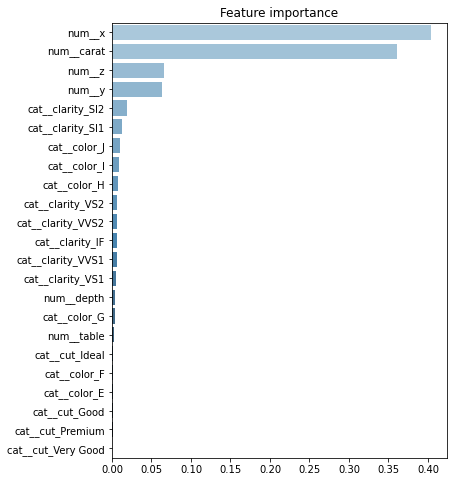

In [ ]:
num_pipeline = Pipeline([
        ('imputer', IterativeImputer()),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False, drop="first")) # returns a 
        # regular matrix that can be combined easily with the data we get from 
        # the numeric pipeline
    ])

IterativeImputer.get_feature_names_out = StandardScaler.get_feature_names_out
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  # patching
#carat	cut	color	clarity	depth	table	price	x	y	z
num_attribs = ['carat', 'depth', 'table', 'x', 'y', 'z']
cat_attribs = ['cut', 'color', 'clarity']

prep_pipeline = ColumnTransformer([ # handle each type of column with appropriate pipeline
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])




from sklearn.ensemble import ExtraTreesRegressor
df_X_prepared = prep_pipeline.fit_transform(df_X)
ex_tree = ExtraTreesRegressor()
ex_tree.fit(df_X_prepared, df_y)
ex_tree.feature_importances_
imp = pd.Series(data=ex_tree.feature_importances_, index=prep_pipeline.get_feature_names_out()).sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

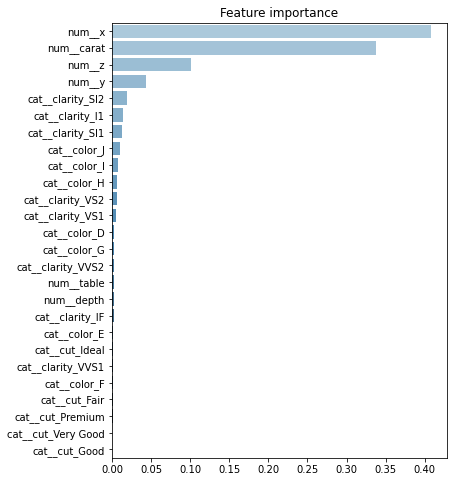

In [ ]:
imp = pd.Series(data=ex_tree.feature_importances_, index=prep_pipeline.get_feature_names_out()).sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


In [ ]:
prep_pipeline.get_feature_names_out()

array(['num__carat', 'num__depth', 'num__table', 'num__x', 'num__y',
       'num__z', 'cat__cut_Fair', 'cat__cut_Good', 'cat__cut_Ideal',
       'cat__cut_Premium', 'cat__cut_Very Good', 'cat__color_D',
       'cat__color_E', 'cat__color_F', 'cat__color_G', 'cat__color_H',
       'cat__color_I', 'cat__color_J', 'cat__clarity_I1',
       'cat__clarity_IF', 'cat__clarity_SI1', 'cat__clarity_SI2',
       'cat__clarity_VS1', 'cat__clarity_VS2', 'cat__clarity_VVS1',
       'cat__clarity_VVS2'], dtype=object)

In [ ]:
df_X_prepared

array([[ 2.56005606, -2.55074762,  2.93386055, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44739205, -1.22042647,  1.13957453, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63753181,  0.52999608,  0.24243153, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.98921948, -1.01037577,  0.24243153, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21499901,  0.74004679,  0.69100303, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72203837, -0.94035886,  0.24243153, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#@title 3) HyperParameter Tuning with Grid (DecisionTree)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
pipe_dt = make_pipeline(prep_pipeline, DecisionTreeRegressor())
param_grid = {"decisiontreeregressor__max_depth" : [1,3,5,7,9],
           "decisiontreeregressor__min_samples_leaf":[1,2,3,4,5,6,7,8],
           "decisiontreeregressor__min_weight_fraction_leaf":[0.1,0.3,0.5],
           "decisiontreeregressor__max_features":["log2","sqrt",None],
           "decisiontreeregressor__max_leaf_nodes":[None,10,30,50,70,80]}
print('The parameter grid : ')
print(param_grid)

grid_search = GridSearchCV(pipe_dt, param_grid, cv=3, n_jobs=-1, verbose=1,
                                 scoring='neg_root_mean_squared_error')
grid_search.fit(df_X, df_y)
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_) # convert to DF for convenience
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)  # sort the data frame
# select only the columns that start with 'param_' and the column 'mean_test_score'
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(5)
#print('Test errof of BaggingRegressor after tuning: ', -filtered_res[-1][0])

The parameter grid : 
{'decisiontreeregressor__max_depth': [1, 3, 5, 7, 9], 'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8], 'decisiontreeregressor__min_weight_fraction_leaf': [0.1, 0.3, 0.5], 'decisiontreeregressor__max_features': ['log2', 'sqrt', None], 'decisiontreeregressor__max_leaf_nodes': [None, 10, 30, 50, 70, 80]}
Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


The best parameters are  {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__max_features': None, 'decisiontreeregressor__max_leaf_nodes': None, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_weight_fraction_leaf': 0.1}


,param_decisiontreeregressor__max_depth,param_decisiontreeregressor__max_features,param_decisiontreeregressor__max_leaf_nodes,param_decisiontreeregressor__min_samples_leaf,param_decisiontreeregressor__min_weight_fraction_leaf,mean_test_score
1182,5,None,10,3,0.1,-1594.60139
1284,5,None,80,5,0.1,-1594.60139
1677,7,None,50,8,0.1,-1594.60139
1674,7,None,50,7,0.1,-1594.60139
1671,7,None,50,6,0.1,-1594.60139


In [ ]:
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_) # convert to DF for convenience
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)  # sort the data frame
# select only the columns that start with 'param_' and the column 'mean_test_score'
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(5)
#print('Test errof of BaggingRegressor after tuning: ', -filtered_res[-1][0])

NameError: ignored

In [ ]:
X_test = test_set.drop("price", axis=1).copy()
y_test = test_set["price"].copy()
y_test.isna().sum()

0

In [ ]:
X_test = test_set.drop("price", axis=1).copy()
y_test = test_set["price"].copy()
y_test.isna().sum()
X_test_prepared = prep_pipeline.transform(X_test)
X_test_prepared.shape
#any(np.isnan(X_test_prepared))
(np.isnan(X_test_prepared)).any()

False

In [ ]:
#@title 4) Stacking Regressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
bag_model= BaggingRegressor(max_features = 23, max_samples = 1.0, n_estimators = 436) #done
knn_model = KNeighborsRegressor(algorithm='auto',leaf_size=27, n_neighbors=4,p=1) #incomplete
et_model = ExtraTreesRegressor(max_depth=33, max_leaf_nodes=429, min_samples_leaf=8, min_samples_split=26)
# Get these models in a list
estimators = [('Bagging', bag_model),
              ('KNN', knn_model),
              ('ExtraTree',et_model)]
#Stack these models with StackingRegressor
stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

In [ ]:
import sklearn.metrics as metrics
stacking_regressor.fit(X_test_prepared, y_test)
stack_model_pred = stacking_regressor.predict(X_test_prepared)
print('Mean absolute error =', metrics.mean_absolute_error(y_test, stack_model_pred))
print('Mean squared error =', metrics.mean_squared_error(y_test, stack_model_pred))
print('Median absolute error =', metrics.median_absolute_error(y_test, stack_model_pred))
print('Explain variance score =', metrics.explained_variance_score(y_test, stack_model_pred))
print('R squared =', metrics.r2_score(y_test, stack_model_pred))

Mean absolute error = 204.74078443482674
Mean squared error = 179082.44914869187
Median absolute error = 85.66453328302737
Explain variance score = 0.9887360834277451
R squared = 0.9887347008521316


In [ ]:
import sklearn.metrics as metrics
bag_model.fit(X_test_prepared, y_test)
bag_model_pred = bag_model.predict(X_test_prepared)
print('Mean absolute error =', metrics.mean_absolute_error(y_test, bag_model_pred))
print('Mean squared error =', metrics.mean_squared_error(y_test, bag_model_pred))
print('Median absolute error =', metrics.median_absolute_error(y_test, bag_model_pred))
print('Explain variance score =', metrics.explained_variance_score(y_test, bag_model_pred))
print('R squared =', metrics.r2_score(y_test, bag_model_pred))

Mean absolute error = 131.25888878881287
Mean squared error = 80405.22762265262
Median absolute error = 44.99082568807353
Explain variance score = 0.9949430337615569
R squared = 0.9949420563180396


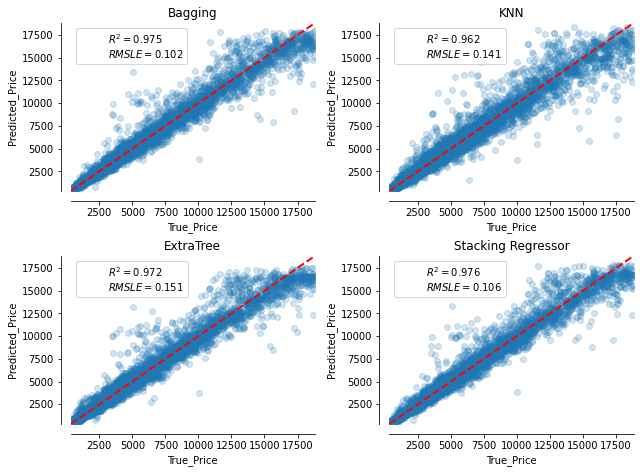

In [ ]:
from sklearn.metrics import r2_score, mean_squared_log_error
import math
def plot_regression_results(ax, y_true, y_pred, title, scores):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('True_Price')
    ax.set_ylabel('Predicted_Price')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)
errors_list=[]
for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    model = est.fit(df_X_prepared, df_y)
                     

    
    pred = model.predict(X_test_prepared)
    errors = y_test - model.predict(X_test_prepared)
    errors_list.append(errors)
    test_r2= r2_score((y_test), (pred))
    
    test_rmsle=math.sqrt(mean_squared_log_error(y_test,pred))
    plot_regression_results(ax,y_test,pred,name,(r'$R^2={:.3f}$' + '\n' + 
                            r'$RMSLE={:.3f}$').format(test_r2,test_rmsle))
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
#HyperParameter Tuning with Random (DecisionTree)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
pipe_dt = make_pipeline(prep_pipeline, DecisionTreeRegressor())
param_distribs_bag = [
    {'decisiontreeregressor__ccp_alpha': randint(70, 500),
     'decisiontreeregressor__min_samples_leaf': randint(1, 9),
     'decisiontreeregressor__min_samples_split': randint(low=2, high=9),
     'decisiontreeregressor__max_features': ,
     'decisiontreeregressor__max_depth': randint(2, 7)}]
random_search_bag = RandomizedSearchCV(pipe_dt, param_distribs_bag, n_iter=100, cv=3,
                                 scoring='neg_root_mean_squared_error', random_state=2000)
random_search_bag.fit(df_X, df_y)
cv_res_rf = pd.DataFrame(random_search_bag.cv_results_)
cv_res_rf.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_res_rf.head()

In [ ]:
pipe_dt = make_pipeline(prep_pipeline, DecisionTreeRegressor())
pipe_dt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'decisiontreeregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num', 'columntransformer__cat', 'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__verbose', 'columntransformer__num__imputer', 'columntransformer__num__scaler', 'columntransformer__num__imputer__add_indicator', 'columntransformer__num__imputer__estimator', 'columntransformer__num__imputer__imputation_order', 'columntransformer__num__imputer__initial_strategy', 'columntransformer__num__imputer__max_iter', 'columntransformer__num__imputer__max_value', 'columntransformer__num__imputer__min_value', 'columntransformer__num__imputer__missing_values', 'columntransformer__num__imputer__n_nearest_f

In [ ]:
#Plot the graphs of different hyperparameters vs cross val&train&test scores

In [ ]:
#@title Ensemble of Different Models
#Voting Regressor & Stacking Regressor
#Voting regressor: Use soft voting and do grid search on the weights argument
#Voting for knn, lr, dt vs (bagging, boosting, rf)

In [ ]:
df = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                    'mask': ['red', 'purple'],
                    'weapon': ['sai', 'bo staff']})
df.to_csv('my_new_file.csv',index=False)